In [38]:
!pip install statsmodels=='0.9.0'
import statsmodels as sm
sm.__version__

'0.9.0'

In [39]:
import pandas as pd

tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [40]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

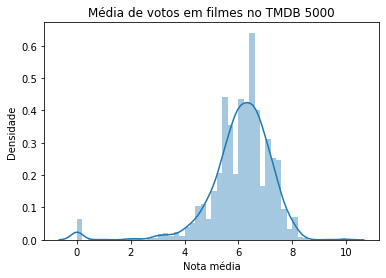

In [41]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

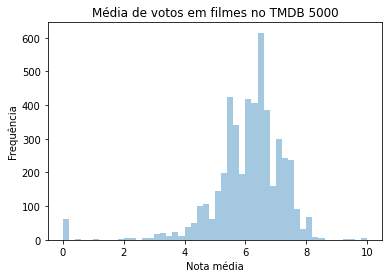

In [42]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

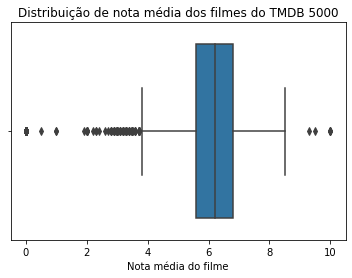

In [43]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000")

Tem algo de estranho com meus dados... não faz sentido filmes cuja nota média é 0 ou 10.... vamos ver?

In [44]:
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [45]:
tmdb.query("vote_average==10").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Detectamos que alguns filmes tiveram poucos votos (ou até mesmo nenhum voto). Decidimos que esses filmes não devem pertencer a nossa análise

In [46]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

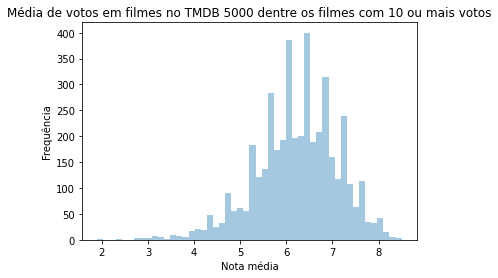

In [47]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

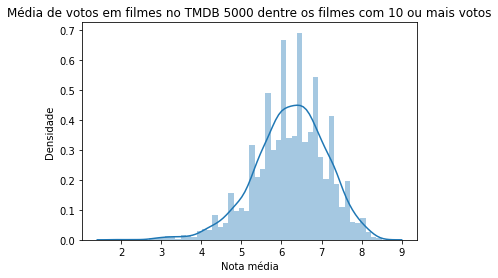

In [48]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

ImportError: ignored

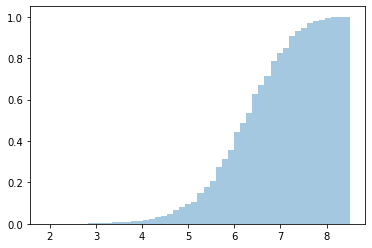

In [49]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no TMDB 5000 com 10 ou mais votos")

In [0]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos")

# Analisaremos também o movielens

In [0]:
notas = pd.read_csv("ratings.csv")
notas.head()

In [0]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

In [0]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k")

In [0]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

In [0]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

In [0]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

In [0]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

In [0]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos")

# Analisando a distribuição dos dados capturados de outros campos do TMDB

In [0]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel="Número de votos", ylabel="Densidade")
ax.set_title("Número de votos em filmes no TMDB 5000 com 10 ou mais votos")



In [0]:

ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Budget (gastos)", ylabel="Densidade")
ax.set_title("Gastos em filmes no TMDB 5000")



In [0]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel="Popularidade", ylabel="Densidade")
ax.set_title("Popularidade em filmes no TMDB 5000")



In [0]:
ax = sns.distplot(tmdb.runtime)
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")



In [0]:
tmdb.runtime.isnull().sum()

In [0]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")


In [0]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True}
                 )
ax.set(xlabel="Tempo de duração", ylabel="% de filmes")
ax.set_title("Tempo de duração em filmes no TMDB 5000")


In [0]:
tmdb.query("runtime>0").runtime.dropna().quantile(0.8)

# Movielens: média dos filmes com pelo menos 10 votos

In [66]:
print("Média dos filmes com pelo menos 10 votos", nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352603


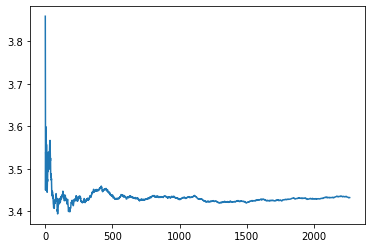

In [67]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [68]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [69]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1...

In [58]:
filmes = pd.read_csv("movies.csv")
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [59]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

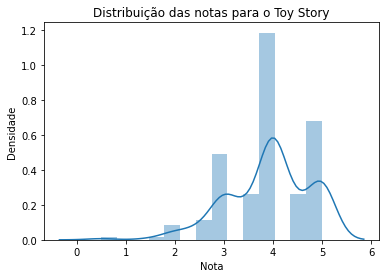

In [60]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Nota", ylabel="Densidade")
ax.set_title("Distribuição das notas para o Toy Story")

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

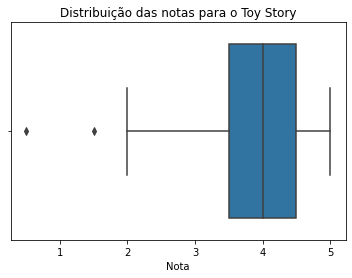

In [61]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição das notas para o Toy Story")

In [62]:
notas1.rating.mean()

3.9209302325581397

In [63]:
notas1.rating.count()

215

In [70]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [71]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

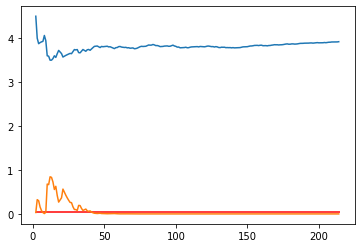

In [72]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i,media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors='r')

In [0]:
valores

### Comparação de dois conjuntos de amostras

In [73]:
print (ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [74]:
print (ztest(notas1.rating, notas.rating))
zconfint(notas.rating, notas1.rating)


(5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [75]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [76]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
descr_todas_as_notas.get_compare(descr_toystory)

In [77]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [78]:
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [79]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

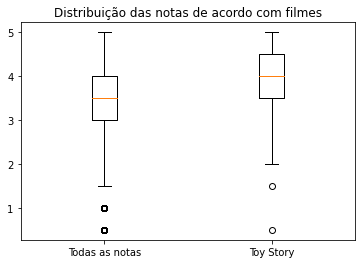

In [80]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1.rating], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

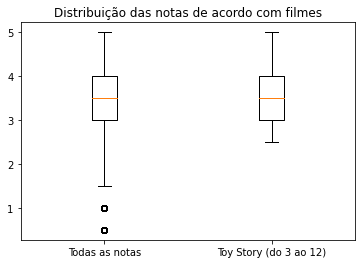

In [81]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

In [82]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparar a média de dois filmes

In [90]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

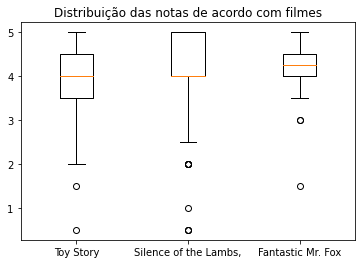

In [83]:
notas1 =  notas.query("movieId == 1")
notas593 =  notas.query("movieId == 593")
notas72226 =  notas.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "Silence of the Lambs,", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com filmes")

In [84]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


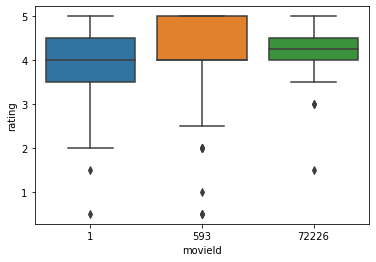

In [85]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1, 593, 72226)"))

In [86]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [87]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [88]:
comparacao = descr_1.get_compare(descr_72226)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [89]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [92]:
from scipy.stats import normaltest

_, p = normaltest(notas1.rating)
p

0.00011053430732728716

In [93]:
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693